# matplotlib高级绘图

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 窗口操作

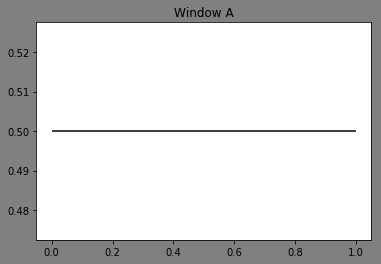

In [9]:
plt.figure('Window A', facecolor='gray')
plt.title('Window A')
plt.hlines(0.5, 0, 1)
plt.show()

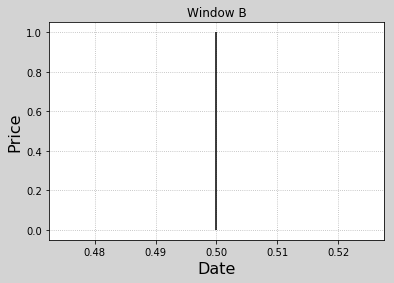

In [13]:
plt.figure('Window B', facecolor='lightgray')
plt.title('Window B')
plt.vlines(0.5, 0, 1)
# 窗口常见参数
plt.xlabel('Date', fontsize=16)
plt.ylabel('Price', fontsize=16)
plt.grid(linestyle=':')
plt.show()

## 子图

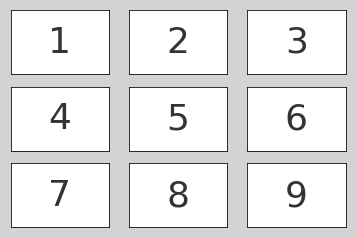

In [19]:
plt.figure('Subplot', facecolor='lightgray')
for i in range(1, 10):
    plt.subplot(3,3,i)
    plt.text(0.5, 0.5, i, ha='center',va='center', size=36, alpha=0.8)
    plt.xticks([])
    plt.yticks([])
plt.show()

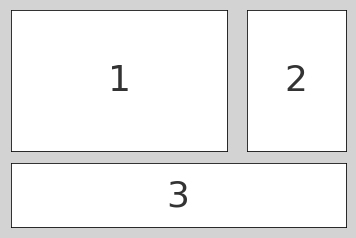

In [32]:
import matplotlib.gridspec as mg
plt.figure('Grid plot', facecolor='lightgray')
gs = mg.GridSpec(3, 3)
plt.subplot(gs[:2, :2]) # 把前两行的前两列合并为一个子图
plt.text(0.5, 0.5, '1', ha='center',va='center', size=36, alpha=0.8)
plt.xticks([])
plt.yticks([])

plt.subplot(gs[:2, 2]) 
plt.text(0.5, 0.5, '2', ha='center',va='center', size=36, alpha=0.8)
plt.xticks([])
plt.yticks([])

plt.subplot(gs[2, :]) 
plt.text(0.5, 0.5, '3', ha='center',va='center', size=36, alpha=0.8)
plt.xticks([])
plt.yticks([])
plt.show()

## 散点图

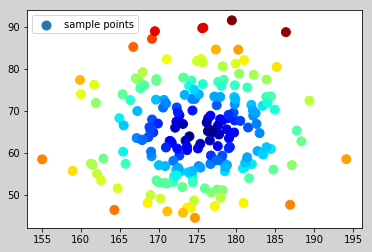

In [97]:
n = 200
x = np.random.normal(175, 6, n)
y = np.random.normal(65, 10, n)
plt.figure('Scatter', facecolor='lightgray')
# plt.scatter(x, y, marker='o', color='dodgerblue', label='sample points', s=80)
d = np.sqrt((x-175)**2 + (y-65)**2)
plt.scatter(x, y, marker='o', label='sample points', s=80, c=d, cmap='jet')
plt.legend()
plt.show()

## 填充

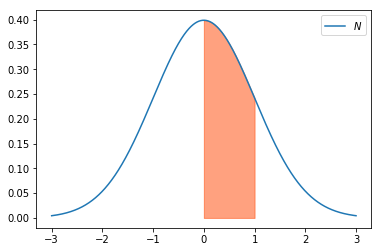

In [99]:
def N(x):
    return np.exp(-x**2/2) / np.sqrt(2*np.pi)

# 绘制标准正态分布图像
x = np.linspace(-3, 3, 1000)
y = N(x)
plt.plot(x, y, label=r'$N$')

# 填充
x2 = np.linspace(0, 1, 200)
y2 = N(x2)
y2_ = np.zeros_like(y2)
plt.fill_between(x2, y2, y2_, y2>y2_, color='orangered', alpha=0.5)

plt.legend()
plt.show()


## 柱状图

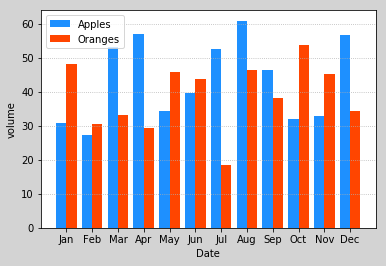

In [128]:
apples = np.random.normal(40, 10, 12)
x = np.arange(apples.size)
plt.figure('Bar Chart', facecolor='lightgray')
plt.grid(linestyle=':', axis='y')
plt.xlabel('Date')
plt.ylabel('volume')
plt.bar(x-0.2, apples, 0.4, color='dodgerblue', label='Apples')

oranges = np.random.normal(40, 10, 12)
plt.bar(x+0.2, oranges, 0.4, color='orangered', label='Oranges')

plt.xticks(x, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
               'Oct', 'Nov', 'Dec'])
plt.legend()
plt.show()

## 直方图

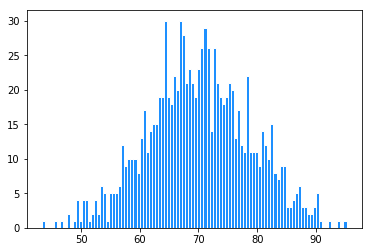

In [189]:
x = np.random.normal(70, 9, 1000)
plt.hist(x, bins=100, color='dodgerblue', edgecolor='white')
plt.show()

### 随机数，数理统计与概率分布

#### 二项分布

In [248]:
a = np.random.binomial(10, 0.6, 1000000)
for i in range(11):
    print(i, ':', (a==i).sum() / 1000000)

0 : 0.000124
1 : 0.001482
2 : 0.010637
3 : 0.042271
4 : 0.111455
5 : 0.200799
6 : 0.250823
7 : 0.214867
8 : 0.121048
9 : 0.040409
10 : 0.006085


#### 超几何分布

In [273]:
r = np.random.hypergeometric(4, 6, 3, 1000000)
for i in range(4):
    print(i, ':', (r==i).sum() / 1000000)

0 : 0.166746
1 : 0.500022
2 : 0.299945
3 : 0.033287


## 饼状图

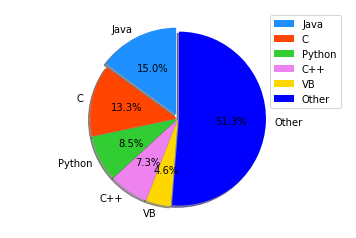

In [284]:
values = [15, 13.3, 8.5, 7.3, 4.62, 51.28]
spaces = [0.05, 0.01, 0.01, 0.01, 0.01, 0.01]
labels = ['Java', 'C', 'Python', 'C++', 'VB', 'Other']
colors = ['dodgerblue', 'orangered', 'limegreen', 'violet', 'gold','blue']
plt.axis('equal')
plt.pie(values, spaces, labels, colors, '%.1f%%', shadow=True, startangle=90)
plt.legend()
plt.show()

## pandas可视化

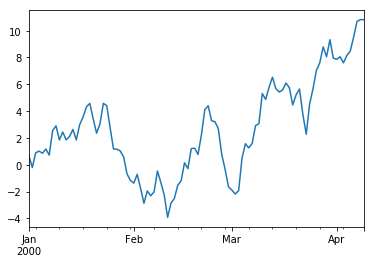

In [311]:
ts = pd.Series(np.random.randn(100),
               index=pd.date_range('1/1/2000', periods=100))
ts = ts.cumsum()
ts.plot()
plt.show()

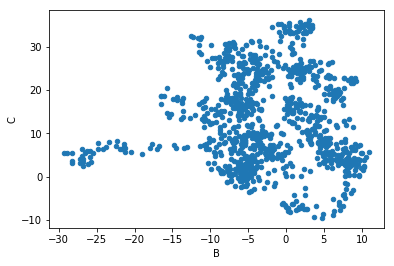

In [364]:
df3 = pd.DataFrame(np.random.randn(1000, 2), columns=['B', 'C']).cumsum()
df3.plot(x='B', y='C',kind='scatter')
plt.show()

In [368]:
s = np.random.normal(75, 3, 10)
s = pd.Series(s)
s.head()

0    77.112990
1    75.544809
2    74.513273
3    75.814221
4    69.248607
dtype: float64

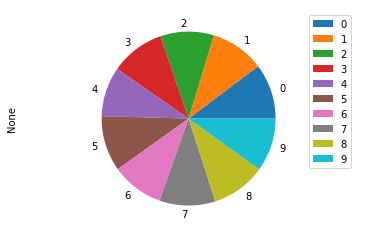

In [383]:
plt.axis('equal')
s.plot(kind='pie')
plt.legend()